In [4]:
%matplotlib inline

from matplotlib import pyplot
import geopandas
import numpy as np

from tile_units import TileUnit, TileShape
from tile_map import TileGrid, Tiling

In [5]:
ak = geopandas.read_file("../data/imd-auckland-2018.gpkg")

<AxesSubplot:>

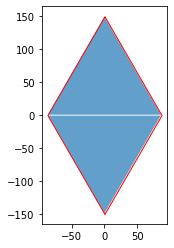

In [6]:
tile_unit = TileUnit(shape = TileShape.TRIANGLE, to_hex = False, 
                     spacing = 100, crs = ak.crs)
ax = tile_unit.elements.plot(column = "element_id", edgecolor = "w", alpha = .7)
tile_unit.tile.plot(ax = ax, facecolor = "#00000000", edgecolor = "r")

In [8]:
tiling = Tiling(tile_unit, ak, id_var = "DZ2018")

In [9]:
tiling = ak.overlay(tiling.rotated(22.5))

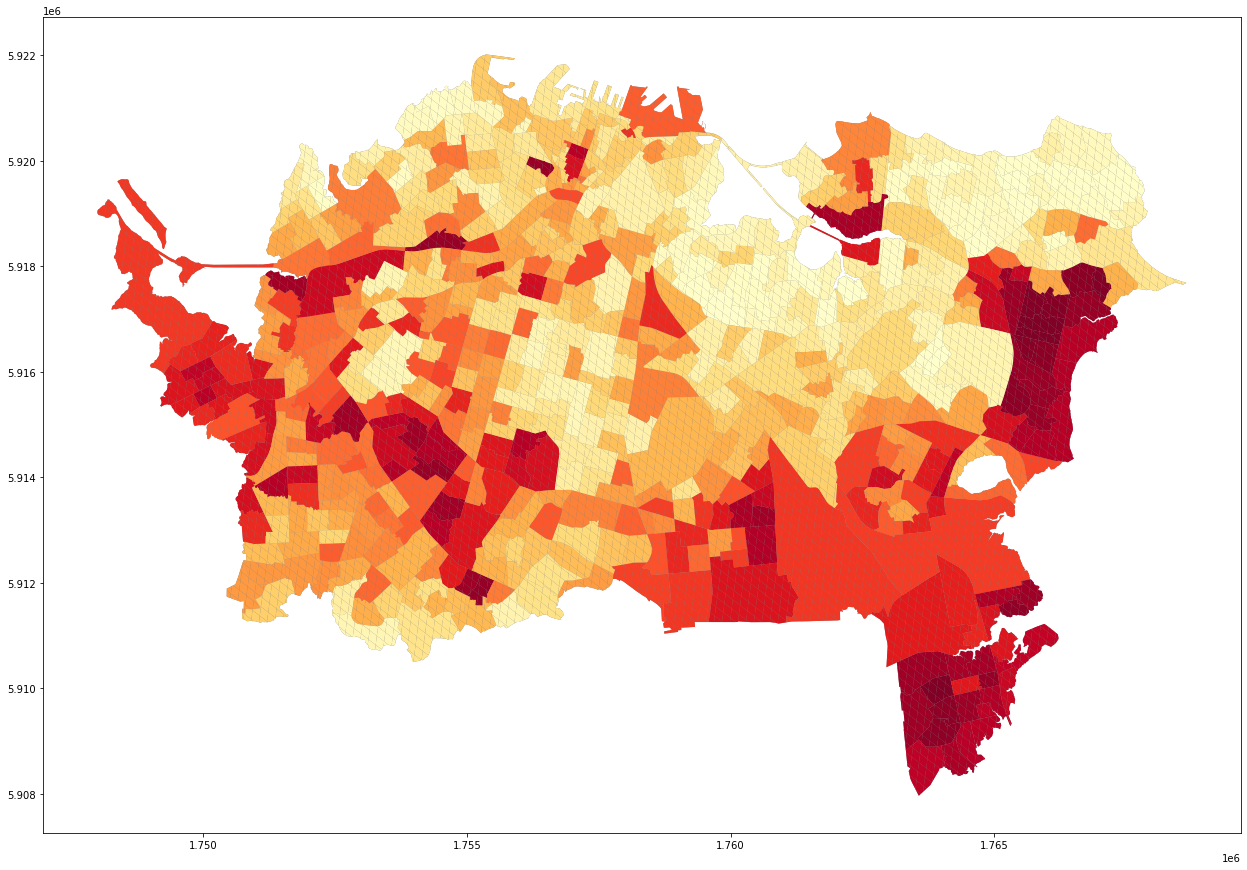

In [10]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
ak.plot(ax = ax, facecolor = "grey", linewidth = 0)

strands = set(tiling.element_id)
cols = [x for x in tiling.columns if "Rank" in x]
cmaps = ("YlOrRd", "BuGn", "YlGnBu", "RdPu")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling[tiling.element_id == strand].plot(ax = ax, column = col, 
                                             cmap = cmap, linewidth = 0)
